In [4]:
%pip install ultralytics
from ultralytics import YOLO
import os


In [5]:

!unzip -q "/content/drive/MyDrive/disord.zip" -d "/content/drive/MyDrive/disord"



replace /content/drive/MyDrive/disord/disord/best (4).pt? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace /content/drive/MyDrive/disord/disord/best (4).pt? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
A


In [7]:
PROJECT_PATH = '/content/drive/MyDrive/disord/disord'
DATA_YAML_PATH = os.path.join(PROJECT_PATH, 'datason.yaml')

# Eğitime devam edeceğimiz modelimizi yüklüyoruz
model_path = os.path.join(PROJECT_PATH, 'best (4).pt')
model = YOLO(model_path)

# Doğrudan eğitimi başlatıyoruz, çünkü YAML dosyamız zaten hazır!
results = model.train(
    data=DATA_YAML_PATH,
    epochs=20,
    imgsz=640,
    name='dyslexia_finetune_run2' # Sonuçların kaydedileceği yeni klasör adı
)

print("Eğitim tamamlandı!")

Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/disord/disord/datason.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=/content/drive/MyDrive/disord/disord/best (4).pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=dyslexia_finetune_run22, nbs=64, nms=False, opset=None, optimize=False, optimiz

In [12]:
from ultralytics import YOLO

model = YOLO('/content/runs/detect/dyslexia_finetune_run22/weights/best.pt')

results = model.train(
    data='/content/drive/MyDrive/disord//disord/datason.yaml',
    epochs=20,
    imgsz=640,
    batch=8,
    name='dyslexia_augmented_v2',

    # 🧩 Augmentations (el yazısına özel)
    degrees=10,          # küçük açısal dönüş
    translate=0.15,      # x,y yönlerinde kaydırma
    scale=0.5,           # rastgele yakınlaştır/uzaklaştır
    shear=2.0,           # hafif kaydırma (harf eğimi)
    perspective=0.0008,  # küçük perspektif farkı

    # 🎨 Renk varyasyonları
    hsv_h=0.0,           # renk tonu sabit (tek kanal)
    hsv_s=0.4,           # kontrast
    hsv_v=0.3,           # parlaklık farkı

    # 🧠 Noise / blur / mix
    mosaic=0.2,          # 4 görüntüyü birleştirme
    mixup=0.1,           # iki resmi harmanlama
    flipud=0.0,          # yukarı-aşağı çevirme kapalı
    fliplr=0.0,          # soldan sağa çevirme kapalı
)


Ultralytics 8.3.232 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/disord//disord/datason.yaml, degrees=10, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.0, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.0, hsv_s=0.4, hsv_v=0.3, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=/content/runs/detect/dyslexia_finetune_run22/weights/best.pt, momentum=0.937, mosaic=0.2, multi_scale=False, name=dyslexia_augmented_v2, nbs=64, nms=False, opset=None, optimize=False, 

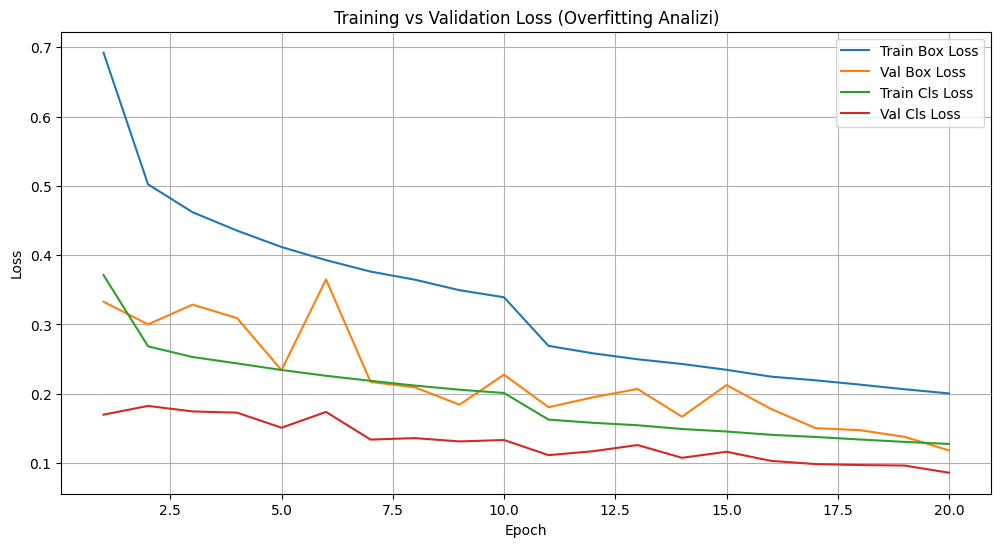

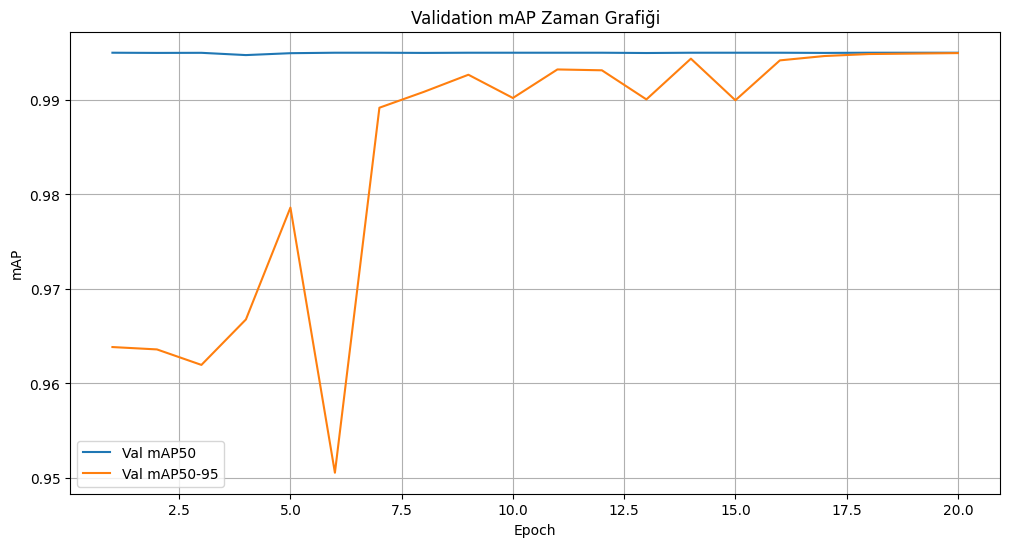

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Kullanıcı tarafından yüklenen dosya
csv_path = "/content/runs/detect/dyslexia_augmented_v2/results.csv"

# CSV dosyasını oku
df = pd.read_csv(csv_path)

# -------- LOSS GRAFİĞİ --------
plt.figure(figsize=(12,6))
plt.plot(df['epoch'], df['train/box_loss'], label='Train Box Loss')
plt.plot(df['epoch'], df['val/box_loss'], label='Val Box Loss')
plt.plot(df['epoch'], df['train/cls_loss'], label='Train Cls Loss')
plt.plot(df['epoch'], df['val/cls_loss'], label='Val Cls Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training vs Validation Loss (Overfitting Analizi)")
plt.grid(True)
plt.show()

# -------- mAP GRAFİĞİ (DÜZELTİLDİ) --------
plt.figure(figsize=(12,6))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='Val mAP50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='Val mAP50-95')
plt.xlabel("Epoch")
plt.ylabel("mAP")
plt.legend()
plt.title("Validation mAP Zaman Grafiği")
plt.grid(True)
plt.show()
